# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import csv
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# 'http://api.openweathermap.org/data/2.5/weather?appid=194c964e5a1a1183aaa918d387570b66&q=Bujumbura&units=metric'

#from config import weather_key

# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_key + "&q="

# create list
responses = []

# Make a request for each city
for x in range(len(cities)):
    print(f"Processing Record: {x} for ID: {cities[x]}")

    # Get one of the posts
    post_response = requests.get(url + str(cities[x]))

    # Save post's JSON
    responses.append(post_response.json())
    


Processing Record: 0 for ID: busselton
Processing Record: 1 for ID: taolanaro
Processing Record: 2 for ID: amahai
Processing Record: 3 for ID: east london
Processing Record: 4 for ID: mataura
Processing Record: 5 for ID: teknaf
Processing Record: 6 for ID: ushuaia
Processing Record: 7 for ID: fairbanks
Processing Record: 8 for ID: flin flon
Processing Record: 9 for ID: ballitoville
Processing Record: 10 for ID: atuona
Processing Record: 11 for ID: zhob
Processing Record: 12 for ID: misratah
Processing Record: 13 for ID: ugoofaaru
Processing Record: 14 for ID: rikitea
Processing Record: 15 for ID: thompson
Processing Record: 16 for ID: olafsvik
Processing Record: 17 for ID: maragogi
Processing Record: 18 for ID: pampa
Processing Record: 19 for ID: puerto ayora
Processing Record: 20 for ID: nola
Processing Record: 21 for ID: bubaque
Processing Record: 22 for ID: codrington
Processing Record: 23 for ID: belmonte
Processing Record: 24 for ID: saint george
Processing Record: 25 for ID: torb

Processing Record: 205 for ID: hithadhoo
Processing Record: 206 for ID: lebu
Processing Record: 207 for ID: lolua
Processing Record: 208 for ID: sobolevo
Processing Record: 209 for ID: preobrazheniye
Processing Record: 210 for ID: laguna
Processing Record: 211 for ID: kapaa
Processing Record: 212 for ID: ilulissat
Processing Record: 213 for ID: torbay
Processing Record: 214 for ID: vaitupu
Processing Record: 215 for ID: hatsukaichi
Processing Record: 216 for ID: gonen
Processing Record: 217 for ID: qaqortoq
Processing Record: 218 for ID: slave lake
Processing Record: 219 for ID: eyl
Processing Record: 220 for ID: qianan
Processing Record: 221 for ID: ucluelet
Processing Record: 222 for ID: krutinka
Processing Record: 223 for ID: sentyabrskiy
Processing Record: 224 for ID: kruisfontein
Processing Record: 225 for ID: lorengau
Processing Record: 226 for ID: madera
Processing Record: 227 for ID: moosomin
Processing Record: 228 for ID: cabo san lucas
Processing Record: 229 for ID: souillac


Processing Record: 408 for ID: paragould
Processing Record: 409 for ID: tombouctou
Processing Record: 410 for ID: wanning
Processing Record: 411 for ID: rungata
Processing Record: 412 for ID: thano bula khan
Processing Record: 413 for ID: saint-pierre
Processing Record: 414 for ID: cameta
Processing Record: 415 for ID: te anau
Processing Record: 416 for ID: bonthe
Processing Record: 417 for ID: flinders
Processing Record: 418 for ID: haibowan
Processing Record: 419 for ID: guarapari
Processing Record: 420 for ID: northam
Processing Record: 421 for ID: richards bay
Processing Record: 422 for ID: prado
Processing Record: 423 for ID: chapayeve
Processing Record: 424 for ID: skjervoy
Processing Record: 425 for ID: vila franca do campo
Processing Record: 426 for ID: esperance
Processing Record: 427 for ID: constitucion
Processing Record: 428 for ID: toliary
Processing Record: 429 for ID: tezu
Processing Record: 430 for ID: kaspiyskiy
Processing Record: 431 for ID: vila velha
Processing Reco

Processing Record: 614 for ID: launceston
Processing Record: 615 for ID: casablanca
Processing Record: 616 for ID: rodrigues alves
Processing Record: 617 for ID: ferme-neuve
Processing Record: 618 for ID: grand-lahou
Processing Record: 619 for ID: kaniama
Processing Record: 620 for ID: san jeronimo
Processing Record: 621 for ID: chimbote
Processing Record: 622 for ID: pedernales
Processing Record: 623 for ID: kavieng
Processing Record: 624 for ID: donetsk
Processing Record: 625 for ID: chaman
Processing Record: 626 for ID: raudeberg
Processing Record: 627 for ID: asau
Processing Record: 628 for ID: pangkalanbuun
Processing Record: 629 for ID: acuna
Processing Record: 630 for ID: husavik
Processing Record: 631 for ID: zhigansk
Processing Record: 632 for ID: nishihara
Processing Record: 633 for ID: gweta
Processing Record: 634 for ID: baghramyan
Processing Record: 635 for ID: yinchuan
Processing Record: 636 for ID: mount gambier
Processing Record: 637 for ID: jan kempdorp
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Build query URL and request your results in Celsius

url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_key + "&q="
units = "&units=imperial"

# create lists
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    
    # Create search query, make request and store in json
    
    response = requests.get(url + city + units)
    response_json = response.json()
    
    try:
        
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        hum.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])

    except:
        # Append null values       
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        hum.append(None)
        cloud.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)
        
# create dataframe
city_data = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max_Temp": max_temp,
    "Humidity": hum,
    "Cloudy": cloud,
    "Wind": wind,
    "Country": country,
    "Date": date
})

# Drop values with NaN and None values.
city_data.dropna(inplace = True) 



In [20]:
city_data.head()


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudy,Wind,Country,Date
0,busselton,-33.65,115.33,37.99,98.0,43.0,3.36,AU,1.592521e+09
2,amahai,-3.33,128.92,82.00,99.0,63.0,3.00,ID,1.592522e+09
3,east london,-33.02,27.91,62.67,64.0,0.0,12.86,ZA,1.592521e+09
4,mataura,-46.19,168.86,39.00,83.0,0.0,3.00,NZ,1.592521e+09
5,teknaf,20.86,92.31,79.03,90.0,100.0,9.06,BD,1.592522e+09


In [21]:
# Export the City_Data into a csv
city_data.to_csv ("../output_data/City_Weather.csv", index = False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
# Check Max Humidity 

city_data.describe()


,Latitude,Longitude,Max_Temp,Humidity,Cloudy,Wind,Date
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02
mean,19.830303,17.704739,68.357513,69.415126,47.420168,8.098807,1.592521e+09
std,32.789359,90.643849,14.508957,21.768775,37.624607,5.809522,2.363506e+02
min,-54.800000,-179.170000,32.000000,6.000000,0.000000,0.020000,1.592521e+09
25%,-7.225000,-59.965000,57.990000,58.000000,6.000000,3.770000,1.592521e+09
50%,21.350000,22.790000,70.380000,75.000000,44.000000,6.930000,1.592522e+09
75%,47.500000,95.450000,79.140000,86.000000,82.500000,10.760000,1.592522e+09
max,78.220000,179.320000,102.090000,100.000000,100.000000,47.200000,1.592522e+09


In [86]:
#  Get the indices of cities that have humidity over 100%.

print("No data with humidity > 100%.  Max Humidity is 100%")


No data with humidity > 100%.  Max Humidity is 100%


In [87]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


print("No data with humidity > 100%.  Max Humidity is 100%")


No data with humidity > 100%.  Max Humidity is 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

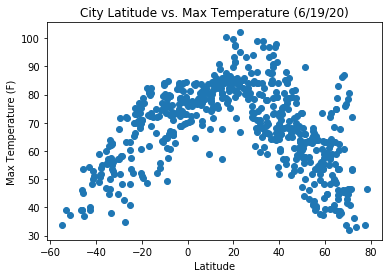

In [57]:
x_values = city_data['Latitude']
y_values = city_data['Max_Temp']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Max Temperature (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../output_data/LatitudevsTemperatureAll.png")
plt.show()


In [58]:
print("On the X axis the 0 point represents the equator.  As we get closer to the equator from the south (-60) and from the north (80) the temperature increases.")

On the X axis the 0 point represents the equator.  As we get closer to the equator from the south (-60) and from the north (80) the temperature increases.


## Latitude vs. Humidity Plot

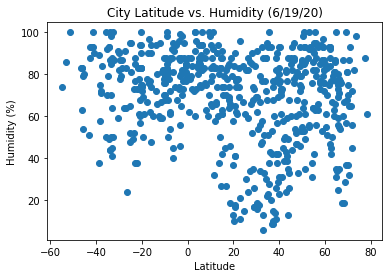

In [43]:
x_values = city_data['Latitude']
y_values = city_data['Humidity']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Humidity (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumidityAll.png")
plt.show()

In [ ]:
print("There is no relationship between latitude and humidity.  Humidity is pretty uniform as you travel the X axis")

## Latitude vs. Cloudiness Plot

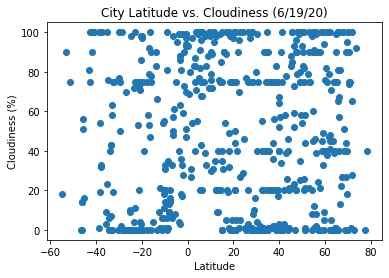

In [44]:
x_values = city_data['Latitude']
y_values = city_data['Cloudy']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Cloudiness (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudinessAll.png")
plt.show()

In [ ]:
print("There appears to be no relationship between latitude and cloudiness.  Cloudiness is pretty uniform as you travel the X axis")

## Latitude vs. Wind Speed Plot

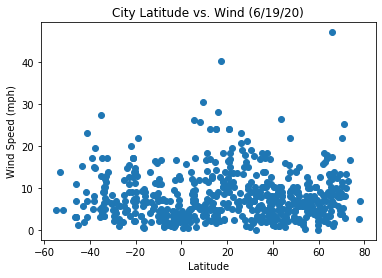

In [45]:
x_values = city_data['Latitude']
y_values = city_data['Wind']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Wind (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/LatitudevsWindSpeedAll.png")
plt.show()

In [ ]:
print("There appears to be no relationship between latitude and wind.  Wind is pretty uniform as you travel the X axis")

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots

In [47]:
# Create Northern Hemisphere Dataframe
north_hem_data = city_data.loc[(city_data['Latitude']>=0)]

# Extract relevant fields from the data frame to lists

# Create Souther Hemisphere Dataframe
south_hem_data = city_data.loc[(city_data['Latitude']<0)]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

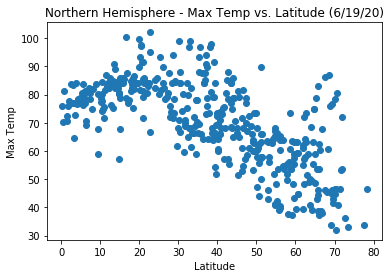

In [48]:
# Draw Scatter Plot for Northern Hem.
x_values = north_hem_data['Latitude']
y_values = north_hem_data['Max_Temp']

# Display Plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


In [ ]:
print("In the Northern Hemisphere, the further you get away from the equator (0 on the X axis) the temperature decreases")

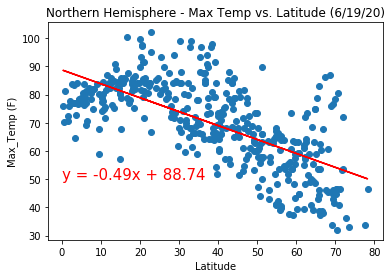

In [59]:
# Perform a linear regression on latitude versus Max Temp

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp (F)')
plt.savefig("../output_data/LatitudevsTemperatureNorth.png")
plt.show()

In [62]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Moderate Negative Strength of Correlation between Max Temp and Latitude in the Northern Hemisphere")

The r value is: -0.6710910388432589
The r-squared is: 0.4503631824157245
There is a Moderate Negative strength of Correlation between Max Temp and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.767838814395573


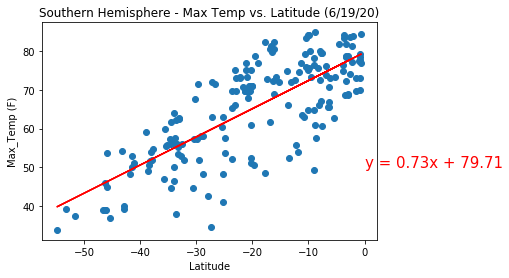

In [50]:
# Draw Scatter Plot for Southern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp (F)')
plt.savefig("../output_data/LatitudevsTemperatureSouth.png")
plt.show()


In [63]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Moderate Positive Strength of Correlation between Max Temp and Latitude in the Southern Hemisphere")

The r value is: -0.6710910388432589
The r-squared is: 0.4503631824157245
There is a Moderate Positive Strength of Correlation between Max Temp and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

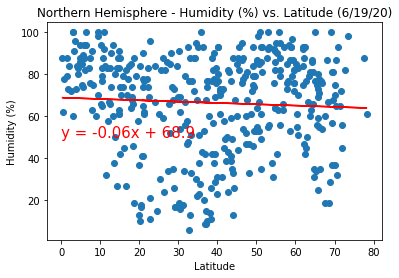

In [67]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumidityNorth.png")
plt.show()


In [66]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Humidity and Latitude in the Northern Hemisphere")

The r value is: -0.05444358536174161
The r-squared is: 0.0029641039870412457
There is a Weak Negative Strength of Correlation between Humidity and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

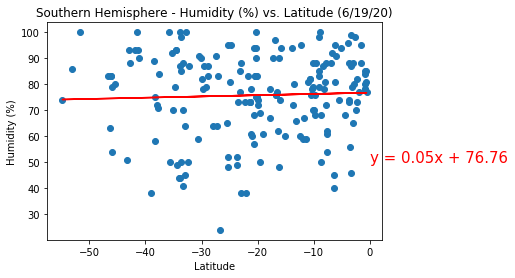

In [68]:
# Draw Scatter Plot for Northern Hem.
x_values = south_hem_data['Latitude']
y_values = south_hem_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumiditySouth.png")
plt.show()

In [70]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Positive Strength of Correlation between Humidity and Latitude in the Southern Hemisphere")

The r value is: 0.04065068570165894
The r-squared is: 0.0016524782480150583
There is a Weak Positive Strength of Correlation between Humidity and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

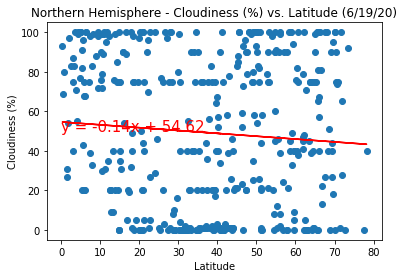

In [73]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Cloudy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudNorth.png")
plt.show()


In [74]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Cloudiness and Latitude in the Northern Hemisphere")

The r value is: -0.07768448497520147
The r-squared is: 0.006034879205862304
There is a Weak Negative Strength of Correlation between Cloudiness and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

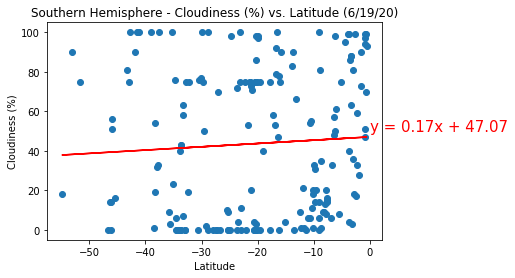

In [75]:
# Draw Scatter Plot for Southern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Cloudy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudSouth.png")
plt.show()

In [77]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Positive Strength of Correlation between Cloudiness and Latitude in the Southern Hemisphere")

The r value is: 0.06095592539951643
The r-squared is: 0.003715624841311412
There is a Weak Positive Strength of Correlation between Cloudiness and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

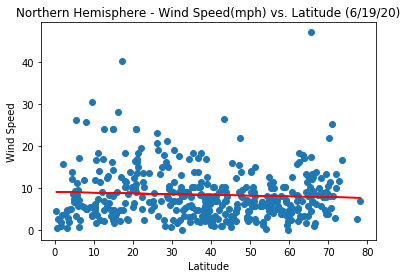

In [80]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/LatitudevsWindNorth.png")
plt.show()


In [82]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Northern Hemisphere")

The r value is: -0.05929739478532322
The r-squared is: 0.003516181028326477
There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

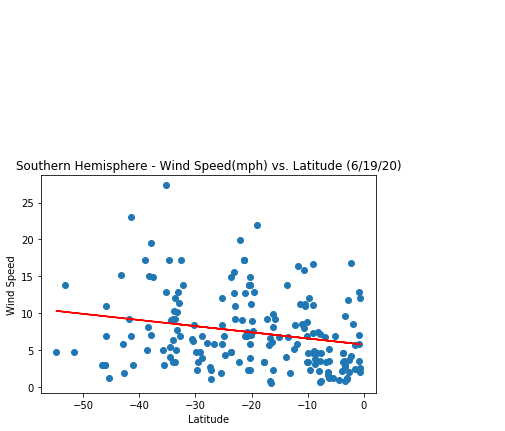

In [83]:
# Draw Scatter Plot for Northern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude (6/19/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/LatitudevsWindSouth.png")
plt.show()

In [85]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Southern Hemisphere")

The r value is: -0.22073184560653322
The r-squared is: 0.04872254766486642
There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Southern Hemisphere
